In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
## Label Encoder para tratar variáveis categóricas
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import shapiro
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

In [149]:
def apresentando_metricas(test_labels, y_pred):
    ## Calculando métricas
    acc = accuracy_score(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred, average = 'weighted')
    recall = recall_score(test_labels, y_pred, average = 'weighted')
    f1 = f1_score(test_labels, y_pred, average = 'weighted')
    ## Exibindo métricas
    print("Accuracy:", acc)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
def gera_matriz_confusao(test_labels_aux, y_pred_aux):
    ## gerando matriz de confusão
    cm = confusion_matrix(test_labels_aux, y_pred_aux, labels = [0,1,2])
    
    ## plotando matriz de confusão com seaborn
    # plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot = True, fmt='d', cmap = 'Blues',  xticklabels=['setosa', 'versicolo', 'virginica'], 
                yticklabels=['setosa', 'versicolo', 'virginica'], cbar=True)
    
    # Adicionando título e labels
    plt.title('Matriz de Confusão')
    plt.xlabel('Classe Predita')
    plt.ylabel('Classe Real')
    
    # Mostrar o gráfico
    plt.show()
class Modelo():
    def __init__(self):
        pass

    def CarregarDataset(self, path):
        """
        Carrega o conjunto de dados a partir de um arquivo CSV.

        Parâmetros:
        - path (str): Caminho para o arquivo CSV contendo o dataset.
        
        O dataset é carregado com as seguintes colunas: SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm e Species.
        """
        names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
        self.df = pd.read_csv(path, names=names)
    def VisualizarDataset(self, linhas=5):
        """
        Printa o dataframe
        """
        print(self.df.head(linhas))
    def TratamentoDeDados(self):
        """
        Realiza o pré-processamento dos dados carregados.

        Sugestões para o tratamento dos dados:
            * Utilize `self.df.head()` para visualizar as primeiras linhas e entender a estrutura.
            * Verifique a presença de valores ausentes e faça o tratamento adequado.
            * Considere remover colunas ou linhas que não são úteis para o treinamento do modelo.
        
        Dicas adicionais:
            * Explore gráficos e visualizações para obter insights sobre a distribuição dos dados.
            * Certifique-se de que os dados estão limpos e prontos para serem usados no treinamento do modelo.
        """
        ## Tratamento de variável categórica
        label_encoder = LabelEncoder()
        especies = label_encoder.fit_transform(self.df['Species'])

        ## Normalização por MinMaxScaler
        features = self.df.drop('Species', axis=1)
        scaler = preprocessing.MinMaxScaler()
        df_normalizado = scaler.fit_transform(features)
        names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
        self.df = pd.DataFrame(df_normalizado, columns = names)
        ## Transformar em int facilita o modelo a entender que são CLASSES, mesmo que os dados estejam formatados em: 0.0, 1.0 e 2.0
        self.df['Species'] = especies
        self.df['Species'] = self.df['Species'].astype(int)
        # print("Classes codificadas:", self.df['Species'].unique())

        pass

    def Treinamento(self, modelo):
        """
        Treina o modelo de machine learning.

        Detalhes:
            * Utilize a função `train_test_split` para dividir os dados em treinamento e teste.
            * Escolha o modelo de machine learning que queira usar. Lembrando que não precisa ser SMV e Regressão linear.
            * Experimente técnicas de validação cruzada (cross-validation) para melhorar a acurácia final.
        
        Nota: Esta função deve ser ajustada conforme o modelo escolhido.
        """
        # print(self.df)
        ### Variável target
        labels = np.array(self.df['Species'])
        ### Variáveis de treinamento do modelo
        features = self.df.drop('Species', axis = 1)
        
        feature_list = list(features.columns)
        
        features = np.array(features)

        ## Separando em treino e teste
        train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                                    test_size = 0.25, random_state = 42)

         # Salvando os dados de teste como atributos da classe (para que sejam utilizados em teste de modelo)
        self.test_features = test_features
        self.test_labels = test_labels
        
        if(modelo == 0): ## Random Forest
            ## número de árvores
            n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
            
            ## número de features a ser considerado em cada separação
            max_features = ['sqrt', 'log2', None]
            
            ## máximo número de levels em cada árvore
            max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
            max_depth.append(None)
            
            ## número mínimo de amostras para divisão do nó
            min_samples_split = [2, 5, 10]
            ## número mínimo de amostras em cada nó folha
            min_samples_leaf = [1, 2, 4]
            
            ## Método de selecionar amostras para treinar cada árvore
            bootstrap = [True, False]
            
            random_grid = {'n_estimators': n_estimators,
                           'max_features': max_features,
                           'max_depth': max_depth,
                           'min_samples_split': min_samples_split,
                           'min_samples_leaf': min_samples_leaf,
                           'bootstrap': bootstrap}
            
            rf = RandomForestClassifier()
            
            ## n_iter = número de iterações para busca de melhores hiperparâmetros
            ## cv = número de folds para cross-validation
            ## verbose = controls
            ## n_jobs = deixar mais rápido o processamento
            
            model = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,cv = 10,
                                           verbose = 2, random_state = 42, n_jobs =-1)
            ## Depois de achados os melhores hiperparametros (ainda que não o máximo global),alimenta-se o modelo de novo
            ## Depois de "rf_random.fit", o modelo está treinado com cross-validation e com hyperparametros tunados
            # rf_random.fit(train_features, train_labels)
            # self.modelo = rf_random.best_estimator_

        if(modelo == 1): ##SVM
            ## Criando modelo
            model = SVC(random_state = 42)
            ## Selecionando hiperparâmetros teste para construir o modelo
            random_grid = {
                'C': [0.1, 1, 10, 100],
                'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                'gamma': ['scale', 'auto']
            }
            ## Fazendo RandomizeSearch para procurar melhores parâmetros
            model = RandomizedSearchCV(estimator = model, param_distributions = random_grid, 
                                          n_iter = 10, scoring = 'accuracy', cv =3, random_state = 42, n_jobs = -1)


        if(modelo == 2): ## Naive Bayes
            ## Criando modelo
            model = GaussianNB()

            random_grid = {
                ## Suavização da variância
                'var_smoothing': np.logspace(0, -9, num=100), 
                ## Probabilidade inicial para as classes ([0,1,2])
                'priors': [None, [0.33, 0.33, 0.34], [0.5, 0.25, 0.25], [0.7, 0.2, 0.1]] 
            }
            
            model = RandomizedSearchCV(estimator = model, param_distributions = random_grid,
                                          n_iter = 10, scoring = 'accuracy', cv=10, random_state = 42, n_jobs = -1)
        if(modelo == 3): ## K-Neighbors
            model = KNeighborsClassifier()
            random_grid = {
                'n_neighbors': np.arange(1, 21),  # Número de vizinhos considerados
                'weights': ['uniform', 'distance'],  # Função dos pesos: uniforme ou ponderada em distâncias
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Técnica de seleção de vizinhos
                'leaf_size': np.arange(20, 50),  # Para algoritmos baseados em árvore, tamanho das folhas
                'p': [1, 2],  # Cálculo de distância: 1 para Manhattan, 2 para Euclidiana
                  # Parâmetro de distância: 1 para Manhattan, 2 para Euclidiana
            }
            model = RandomizedSearchCV(estimator = model, param_distributions = random_grid,
                                          n_iter = 10, scoring = 'accuracy', cv=10, random_state = 42, n_jobs = -1)
        if(modelo == 4): ##XGBoost (Extreme Gradient Boosting)
            model = XGBClassifier(eval_metric = 'mlogloss', random_state = 42)

            random_grid = {
                'n_estimators': [100, 200, 300, 400, 500],  # Quantidade de árvores
                'max_depth': [3, 4, 5, 6, 7],  # Profundidade máxima das árvores
                'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # Taxa de aprendizado
                'subsample': [0.7, 0.8, 0.9, 1.0],  # Fração de amostras para cada ávore
                'colsample_bytree': [0.7, 0.8, 0.9, 1.0],  # Fração de características por árvore
                'gamma': [0, 0.1, 0.2, 0.3, 0.4],  # Regularização de crescimento da Árvore
                'reg_alpha': [0, 0.1, 0.2, 0.3],  # Regularização L1 (Lasso)
                'reg_lambda': [0, 0.1, 0.2, 0.3]  # Regularização L2 (Ridge)
            }
            model = RandomizedSearchCV(estimator = model, param_distributions = random_grid,
                                          n_iter = 10, scoring = 'accuracy', cv=10, random_state = 42, n_jobs = -1)
    
        ## Alimentando modelo treinado
        model.fit(train_features,train_labels)
        ## Guardando melhores parâmetros e hiperparâmetros
        self.modelo = model.best_estimator_
        print("Modelo treinado!!")
        pass

    def Teste(self):
        """
        Avalia o desempenho do modelo treinado nos dados de teste.

        Esta função deve ser implementada para testar o modelo e calcular métricas de avaliação relevantes, 
        como acurácia, precisão, ou outras métricas apropriadas ao tipo de problema.
        """
        y_pred = self.modelo.predict(self.test_features)
        # rf_random.predict(test_features)
        apresentando_metricas(self.test_labels, y_pred)
        gera_matriz_confusao(self.test_labels, y_pred)
        
        pass

    def Train(self, modelo):
        """
        Função principal para o fluxo de treinamento do modelo.

        Este método encapsula as etapas de carregamento de dados, pré-processamento e treinamento do modelo.
        Sua tarefa é garantir que os métodos `CarregarDataset`, `TratamentoDeDados` e `Treinamento` estejam implementados corretamente.
        
        Notas:
            * O dataset padrão é "iris.data", mas o caminho pode ser ajustado.
            * Caso esteja executando fora do Colab e enfrente problemas com o path, use a biblioteca `os` para gerenciar caminhos de arquivos.
        """
        self.CarregarDataset("iris.data")  # Carrega o dataset especificado.

        # Tratamento de dados opcional, pode ser comentado se não for necessário
        self.TratamentoDeDados()

        self.Treinamento(modelo)  # Executa o treinamento do modelo

        self.Teste()
# Lembre-se de instanciar as classes após definir suas funcionalidades
# Recomenda-se criar ao menos dois modelos (e.g., Regressão Linear e SVM) para comparar o desempenho.
# A biblioteca já importa LinearRegression e SVC, mas outras escolhas de modelo são permitidas.


In [150]:
model = Modelo()

Modelo treinado!!
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


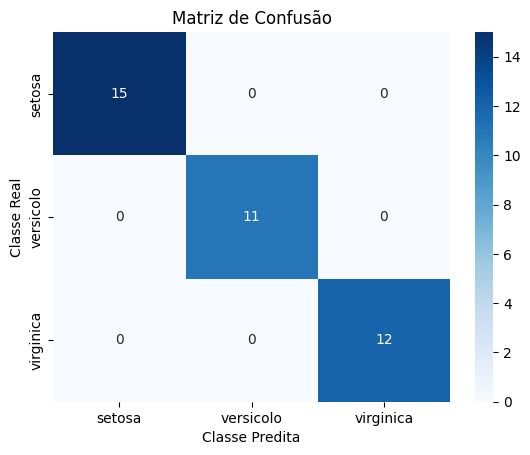

In [151]:
model.Train(4)

## Resultados para os Modelos Treinados: 
- OBS: todos modelos foram treinados com cross-validation e tunagem por hiperparâmetros
- OBS: dada a quantidade pequena de dados (150) , a chance dos modelos resultarem em Overfitting é muito maior
- Uma solução simples seria obter mais dados, outra alternativa seria criar amostras artificiais para treinamento do modelo
- Com a quantidade de dados utilizados (150), é difícil medir a qualidade de cada modelo dado que a maioria apresentou 100% de accuracy, provavelmente resultado de Overffiting (principalmente pela quantidade de dados) 
## Comparação de Modelos
- SVM:
    - 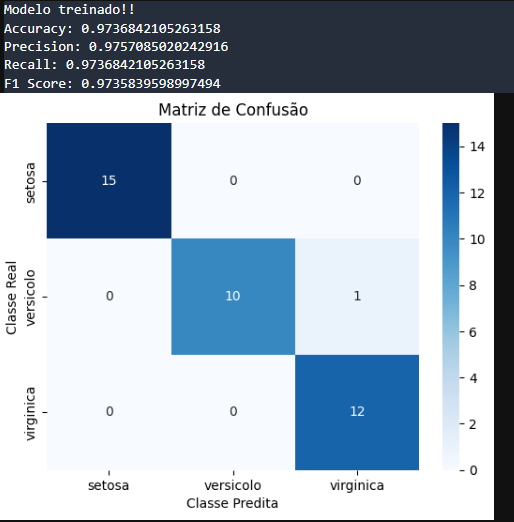
    - Para 3 quantidades de folds usados para cross-validations(cv=[3,5,10]), deu 100% de accuracy para 3 folds, para 5 e 10 resultou na matriz apresentada acima
- Naive Bayes, K-Neighbors, XGboost, Random Forest:
    - 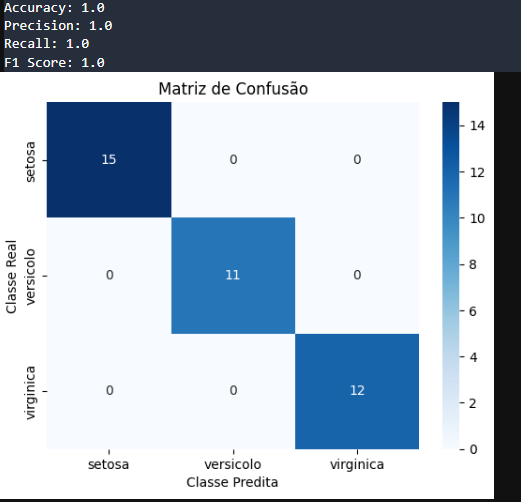
    - Mesmo resultado para 3 quantidades de folds testados, 100% de accuracy

# Tratamento dos Dados: explicação das decisões com base no estudo dos dados

## Dados Nulos
    - Não há necessidade de tratar, haja vista que as colunas para tratamento não possuem dados nulos

In [12]:
names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
df_aux = pd.read_csv("iris.data", names = names)

In [13]:
df_aux.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Transformação de variáveis categóricas
- Nota-se que a variável "Species" possui 3 categorias perfeitamente balanceadas
- Trata-se da variável target
- Escolheu-se utilizar o Label Encoder
  - 0 = Iris-setosa
  - 1 =  Iris-versicolo
  - 2 = : Iris-virginica

In [14]:
df_aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
df_aux['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [16]:
label_encoder = LabelEncoder()

In [17]:
df_aux['Species'] = label_encoder.fit_transform(df_aux['Species'])


In [18]:
for i, classe in enumerate(label_encoder.classes_):
            print(f"{i}: {classe}")

0: Iris-setosa
1: Iris-versicolor
2: Iris-virginica


In [19]:
# df_aux['Species'].value_counts()

## Visualização de Distribuição dos Dados
    - Auxilia na verificação de outliers e anomarlidades
    - Verificação se a distribuição é normal ou não

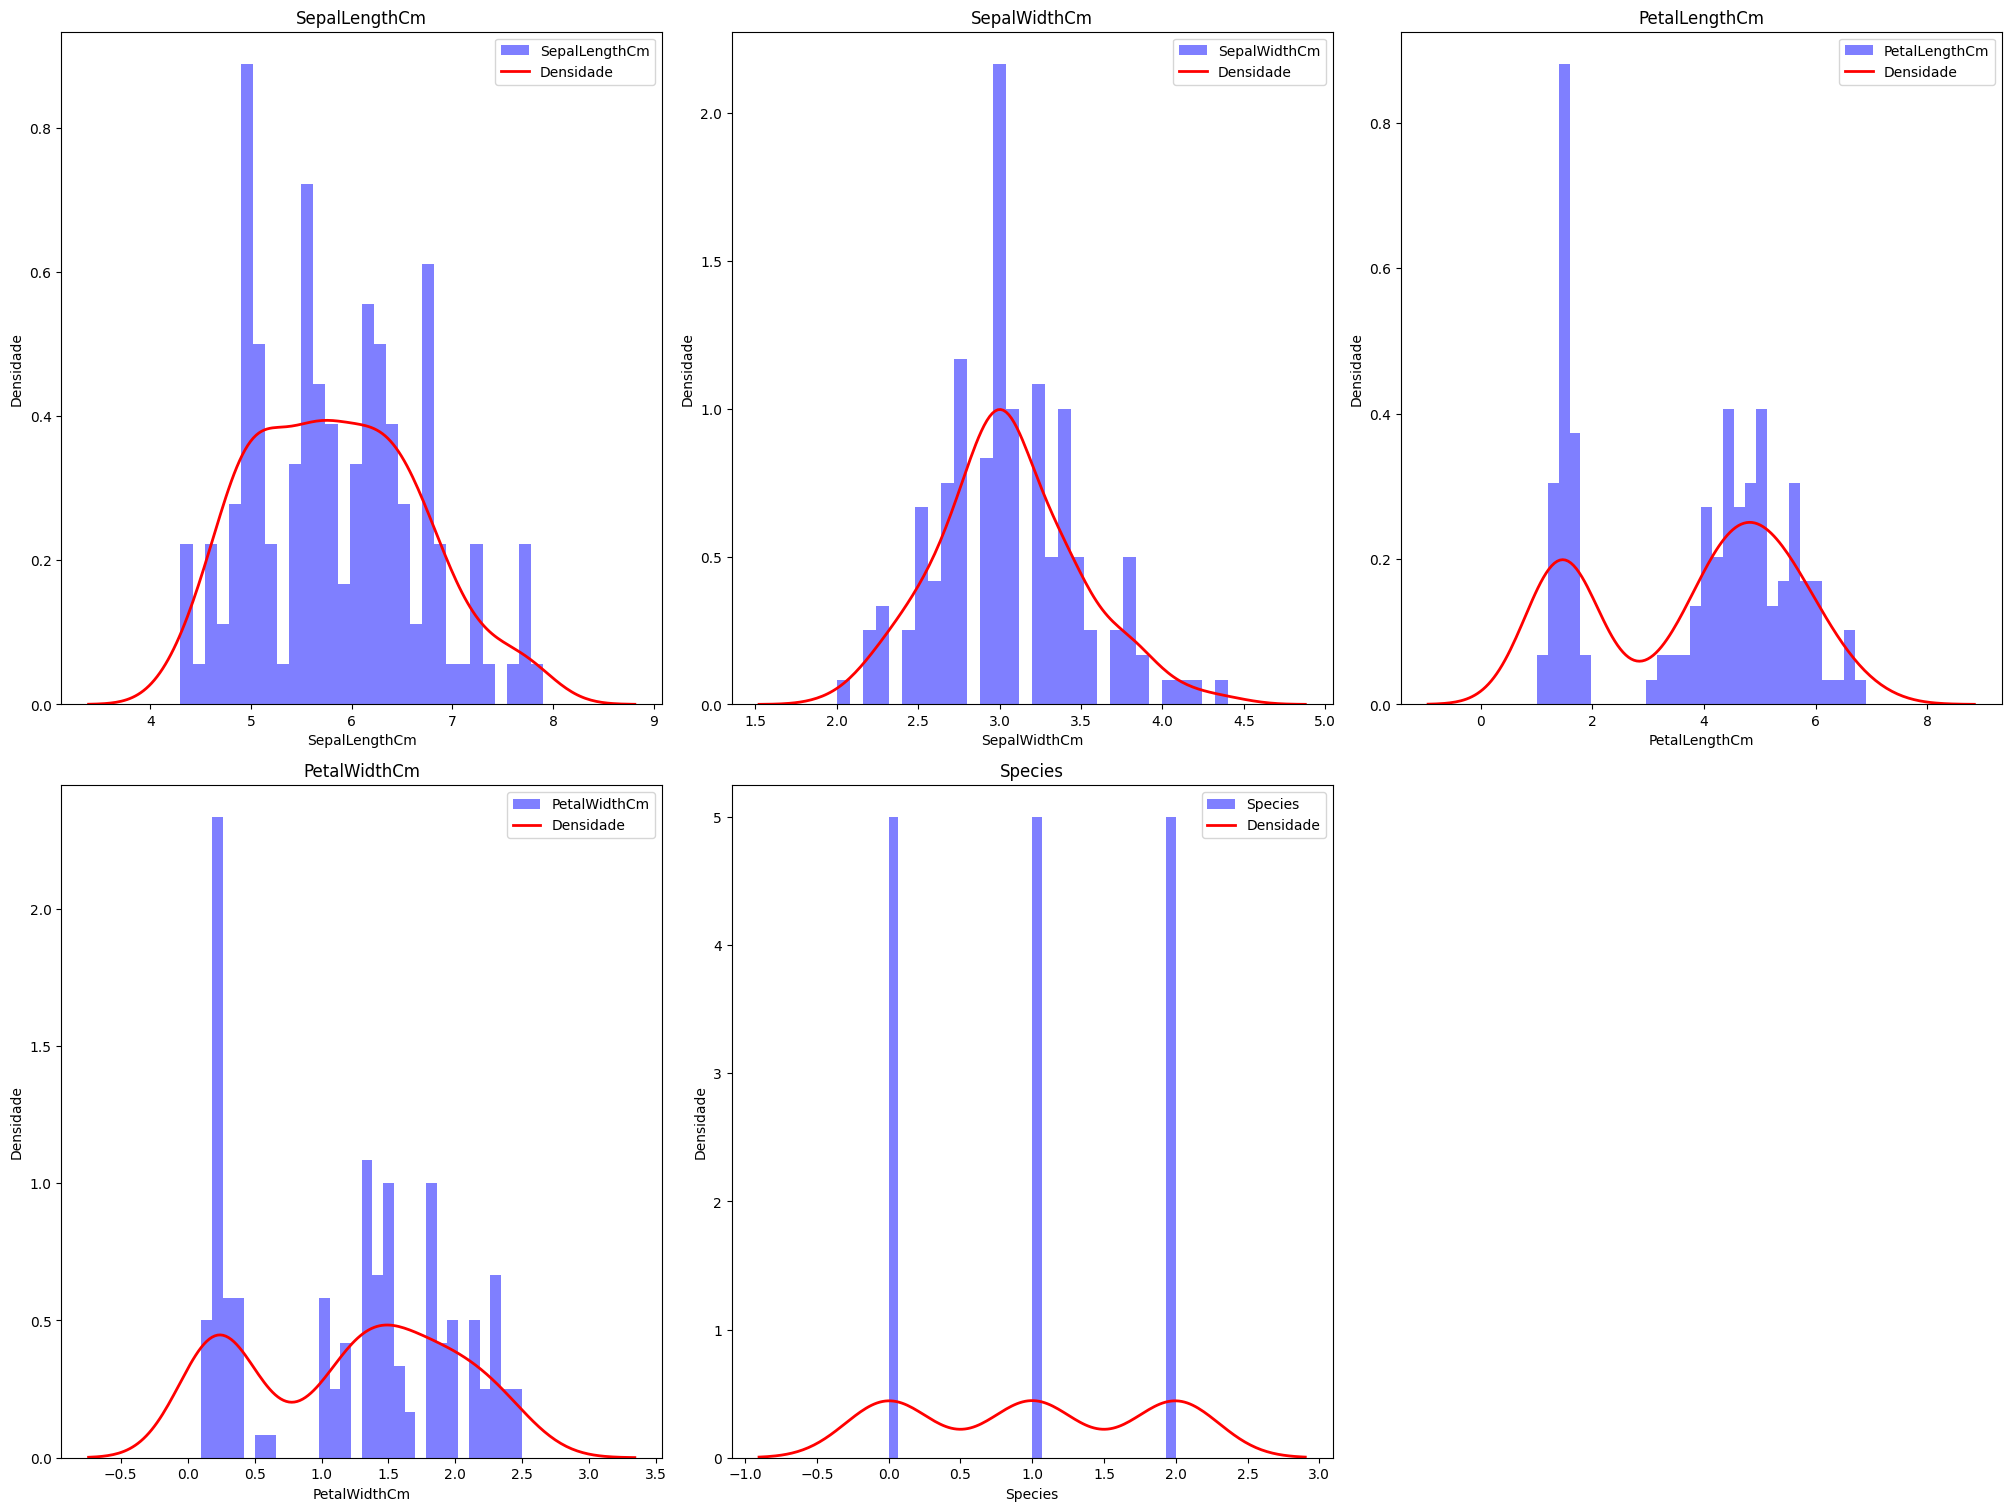

In [20]:
## Seleção das colunas
numeric_cols = df_aux.columns.tolist()
# numeric_cols.remove('Species')

## Parâmetros de visualização 
nrows = 2
ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15), constrained_layout=True)
axs = axs.flatten()

for i, col in enumerate(numeric_cols):
    ## considerando apenas valores não ausentes para cada histograma
    axs[i].hist(df_aux[col].dropna(), bins=30, alpha=0.5, color='blue', label=col, density=True)
    
    ## Linha de densidade
    sns.kdeplot(df_aux[col].dropna(), ax=axs[i], color='red', lw=2, label='Densidade')

    ## Para cada um dos histogramas
    axs[i].set_title(f'{col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Densidade')
    axs[i].legend()

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axs[j])

plt.show()


## Avaliando Normalidade

- Vamos avaliar a Normalidade utilizando o teste de Shapiro-Wilk
- Aqui consideramos nivel de significância de 0.05, neste caso
- Foram plotados histogramas de distribuição apenas para observar a distribuição dos dados
- E os resultados fazem sentido de acordo com os Histogramas

 ### Shapiro-Wilk
 - Ideal para amostras pequenas (50 a 2000), como é o caso
 - Popular no cálculo de normalidade
 - Baseado na comparação de coeficientes calculdados entre a distribuição da amostra e a distribuição normal teórica

- Hipóteses de teste Shapiro-Wilk
    - Hipótese Nula, H0 (pressuposta inicialmente): distribuição é normal (mais próximo de 1)
    - Hipótese Alternativa , H1 (contrária a H0): distribuição não normal (mais próximos de 0)
- Lembrando, quanto maior o p-value, maior a probabilidade de não rejeição da hipótese nula, ou seja, maior a validação dela

In [21]:
def check_normality(data):
    results = []
    for col in data.columns:
        ## Considera apenas valores não nulos na análise
        stat, p_value = shapiro(data[col].dropna()) 
        # Adiciona o resultado à lista (1 para normal, 0 para não normal)
        is_normal = 1 if p_value > 0.05 else 0
        results.append({'column': col, 'normal': is_normal})
    normality_df = pd.DataFrame(results)
    return normality_df

normality_results = check_normality(df_aux)
normality_results

,column,normal
0,SepalLengthCm,0
1,SepalWidthCm,1
2,PetalLengthCm,0
3,PetalWidthCm,0
4,Species,0


## Visualização de Outliers
    - Verifica-se que não há uma presença significativa de Outliers de modo que sejam realizados tratamentos específicos, 
    apenas alguns pontos da coluna "SepalWidthCm", mas que serão mantidos como teste
    - Portanto, o treinamento será feito com a base de dados integralmente

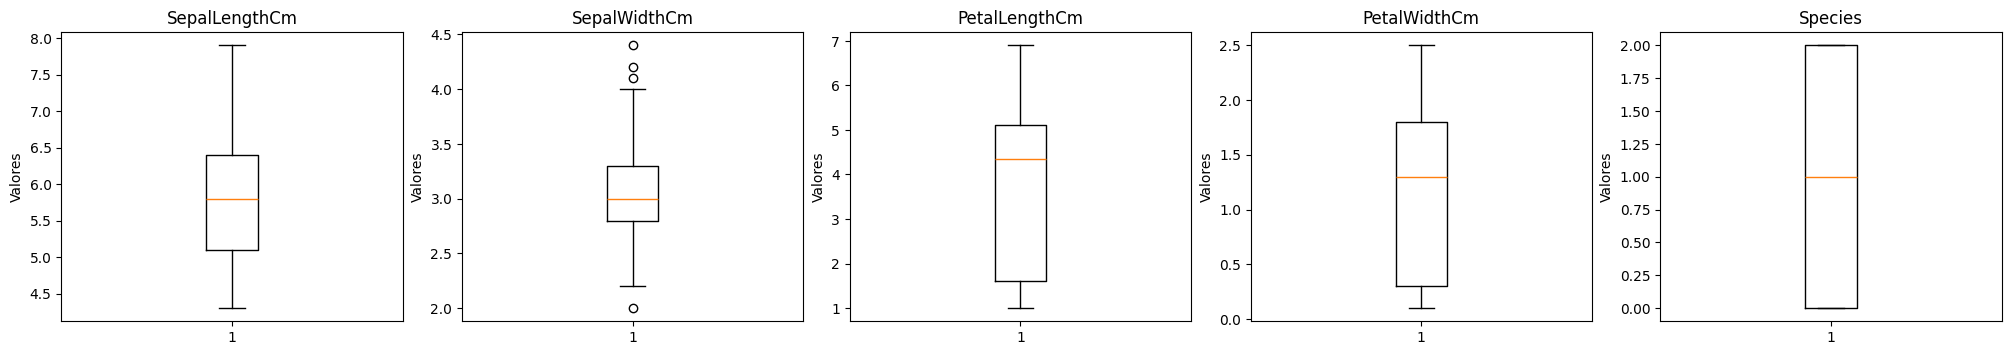

In [22]:
## Seleçao das colunas
numeric_cols = df_aux.columns.tolist()

## Definindo número de linhas e de colunas
nrows = 5
ncols = 5
## Parâmetros de visualização
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15), constrained_layout=True)
axs = axs.flatten()
## Para cada coluna, gera um boxplot considerando todos os dados NÃO NULOS da coluna. Percebe-se isso por data_aux[col].dropna()
for i, col in enumerate(numeric_cols):
    axs[i].boxplot(df_aux[col].dropna())
    axs[i].set_title(f'{col}')
    axs[i].set_ylabel('Valores')
## Aqui apaga-se os subplots vazios
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axs[j])
## Mostra-se os gráficos
plt.show()


## Estudo dos Outliers com Método IQR

- Metódo interquartil identifica outliers baseados em quartis, especificamente o primeiro (25%) e o terceiro (75%)
- Ele calcula os valores representativos do 1 e 3 quartil, traça um limite de consideração de outliers (definidos por lower bound e upper_bound), se passarem dessas métricas, são considerados outliers
- O parâmetro 1.5 é o mais comumente utilizado no Método IQR
- Ao testar o IQR, ele não cortou nenhum outlier do DataFrame, o que faz sentido com a visualização dos BoxPlots
- Portanto, decidiu-se manter os dados por completos

In [23]:
Q1 = df_aux[col].dropna().quantile(0.25)
Q3 = df_aux[col].dropna().quantile(0.75)
IQR = Q3 - Q1

## Calculando os limites inferiores e superiores
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

## Filtrando os outliers
data_cleaned = df_aux[(df_aux[col] >= lower_bound) & (df_aux[col] <= upper_bound)]

In [24]:
data_cleaned.shape[0]

150

## Normalização de Dados

- Para modelos não baseados em árvores de decisão (DecisionTree e RandomForest são baseados, por exemplo), colocar os dados na mesma escala (normalizar) facilita o treinamento e pode melhorar o funcionamento do modelo, principalmente para modelos não lineares, como KNN, Redes Neurais, etc.
- Dados três Scalers comumente usados:
   - MinMaxScaler: performa melhor para dados não normais e é sensível a outliers
   - StandardScaler: performa melhor para dados com distribuição normal, também sensível a outliers
   - RobustScaler: quando deseja diminuir o impacto dos outliers (é menos sensível)
- Foi escolhido o MinMaxScaler dada a maioria das features ter distribuição não normal, além de que não há dados tão discrepantes da distribuição a ponto de ter um grande impacto por outliers

In [25]:
scaler = preprocessing.MinMaxScaler()
df_normalizado = scaler.fit_transform(df_aux)
df_normalizado = pd.DataFrame(df_normalizado, columns = names)

In [26]:
df_normalizado

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1.0
146,0.555556,0.208333,0.677966,0.750000,1.0
147,0.611111,0.416667,0.711864,0.791667,1.0
148,0.527778,0.583333,0.745763,0.916667,1.0


## Treinamento
    - Modelos selecionados: SVM, Random Forest, Naive Bayes, K-nearest neighbour, XGBoost (Extreme Gradient Boosting)

## Decision Tree
- Classificação e Regressão
- Separa o DF em várias perguntas de Verdadeiro/Falso formuladas de acordo com as características dos dados
- Estrutura:
  - 1-) Nó raiz: ponto de partida da divisão
  - 2-) Nós internos: Testes de atributo, cada nó faz uma pergunta e com base na resposta os dados vão para o próximo nível da árvore
  - 3-) Folhas: o final da árvore representam a classe (classificação) ou o valor (regressão)
- Critério de parada:
   - 1-) Todos os dados de um nó pertencem à mesma classe
   - 2-) O nó contém um número mínimo de amostras
   - 3-) A profundidade máxima foi atingida

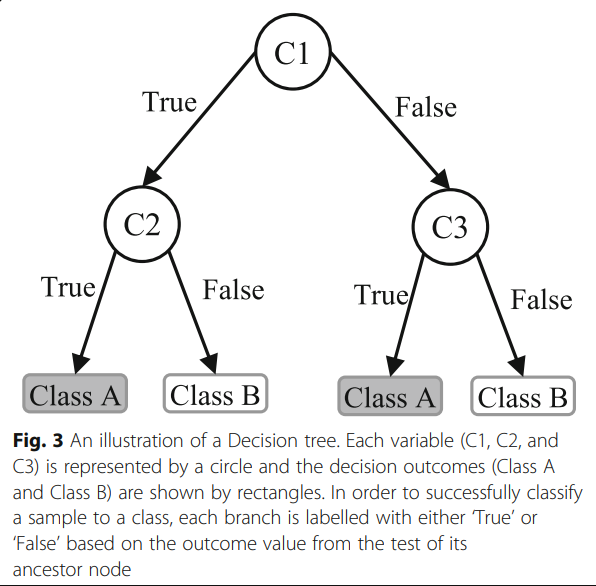
## Random Forest
- Tipo de ensemble classifier (Bootstrap Ensemble)
- Decision Trees são muito sensíveis a Overfitting, e o Random Forest objetiva diminuir essa variância alta usando ensemble e múltiplas decision trees
- Diferentes Decision Trees do Random Forest são treinadas usando diferentes amostras do training dataset
- Cada árvore dá um resultado, então o modelo escolhe por:
 - 1-) Classificação: voting , qual obteve mais votos
 - 2-) Regressão: média de todas as àrvores da floresta
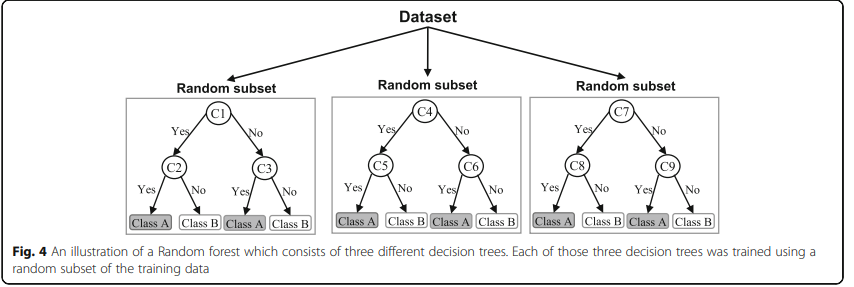

## Definindo Features e Variável Target

In [27]:
### Variável target
labels = np.array(df_aux['Species'])
### Variáveis de treinamento do modelo
features = df_aux.drop('Species', axis = 1)

feature_list = list(features.columns)

features = np.array(features)

## Separando DataFrame em treino e teste
    - O processo de treinamento de um modelo é similar ao aprendizado escolar:
        - Treina-se com o gabarito disponibilizado ( o modelo tem os labels disponíveis, treino )
        - Testa-se o conhecimento sem o gabarito disponível, são as provas (o modelo não tem labels disponíveis, teste)
    - Em geral, a proporção de treino é sempre maior. Nesse caso, estamos utilizando a proporção train/test de 0.75/0.25

In [28]:
## random_state é para que sempre quie rodar o código, gere o mesmo resultado
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)


In [29]:
## Vendo se a separação foi bem feita (ok, foi feita)
print('Training Features Shap:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shap: (112, 4)
Training Labels Shape: (112,)
Testing Features Shape: (38, 4)
Testing Labels Shape: (38,)


## Treinando o Modelo

In [30]:
##n_estimators é o número de árvores de decisão
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

##alimentando o modelo
rf.fit(train_features, train_labels)

RandomForestClassifier(n_estimators=1000, random_state=42)

## Cross-validation
- medida preventiva de overfitting
- separar os dados e gerar múltiplos train-test frações
- permite tunar hiperparâmetros
    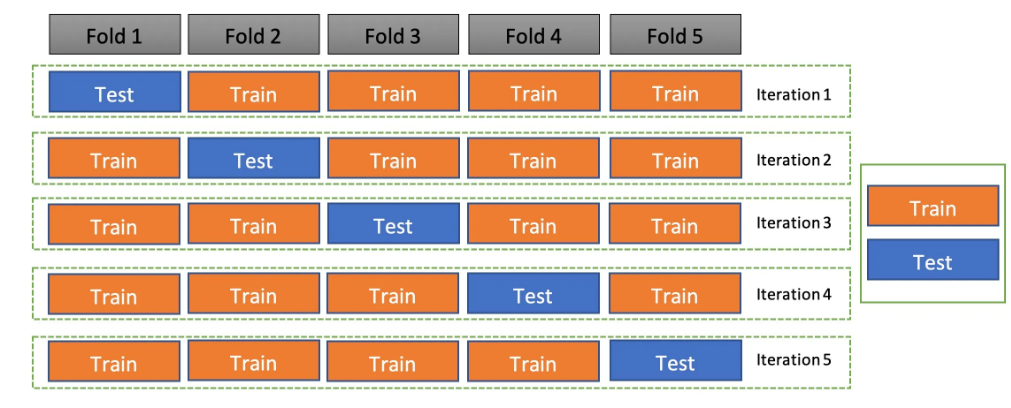

In [31]:
rf = RandomForestClassifier (random_state = 42)
print("Parameters currently in use: \n")
###pprint organizes the print in another way to see, more clean and indented
pprint(rf.get_params())

Parameters currently in use: 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


## Continuação de Cross-validation: tunando hiperparâmetros:
- Um hiperparâmetro é uma configuração externa ao modelo que não pode ser automaticamente estimado pelos dados fornecidos, devem ser testados e avaliados. Diferentes escolhas de hiperparâmetros geram resultados diferentes nos testes do modelo
- Para escolher os melhores hiperparâmetros, temos duas possibilidades comuns:
  - GridSearch: faz todas as combinações de hiperparâmetros , testando o modelo para cada uma, e retorna os melhores hiperparâmetros possíveis (máximo global).
  - RandomizeSearch: testa aleatoriamente algumas combinações, não todas, e retorna o melhor resultado possível. É mais rápido em questão de processamento, mas pode não retornar o melhor resultado (máximo global), por trabalhar com amostras.
- A fim de estudos, será escolhido o RandomizeSearch para mais rápido processamento, mas o algoritmo para tratar o GridSearch é praticamente o mesmo, só mudando o nome da função

## Montando a GRID com os parâmetros

In [32]:
## número de árvores
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

## número de features a ser considerado em cada separação
max_features = ['sqrt', 'log2', None]

## máximo número de levels em cada árvore
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

## número mínimo de amostras para divisão do nó
min_samples_split = [2, 5, 10]
## número mínimo de amostras em cada nó folha
min_samples_leaf = [1, 2, 4]

## Método de selecionar amostras para treinar cada árvore
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [33]:
rf = RandomForestClassifier()

## n_iter = número de iterações para busca de melhores hiperparâmetros
## cv = número de folds para cross-validation
## verbose = controls
## n_jobs = deixar mais rápido o processamento

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,cv = 3,
                               verbose = 2, random_state = 42, n_jobs =-1)
## Depois de achados os melhores hiperparametros (ainda que não o máximo global),alimenta-se o modelo de novo
## Depois de "rf_random.fit", o modelo está treinado com cross-validation e com hyperparametros tunados
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

## Testando o modelo

## Métricas de performance do modelo
- Accuracy: proporções de acerto do modelo
- Recall: mede a habilidade do modelo de achar positivos verdadeiros e EVITAR FALSOS NEGATIVOS
     - 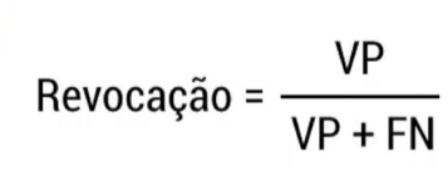
- Precision: mede a habilidade do modelo de evitar FALSOS POSITIVOS
     -  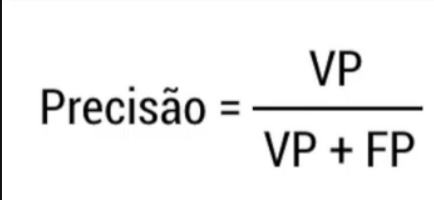
- F1 Score: média harmônica entre recall e precision
- Matriz de confusão:
   - 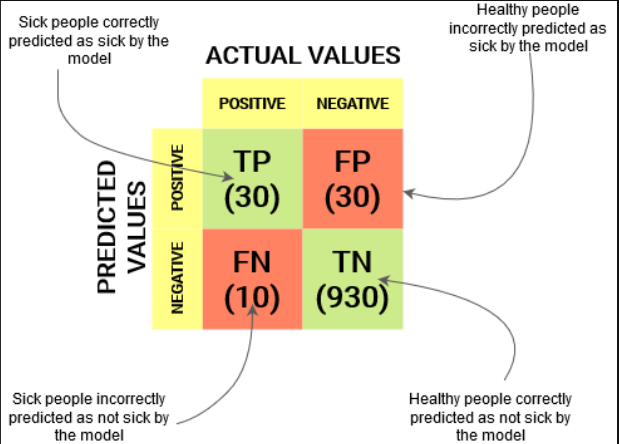
   - 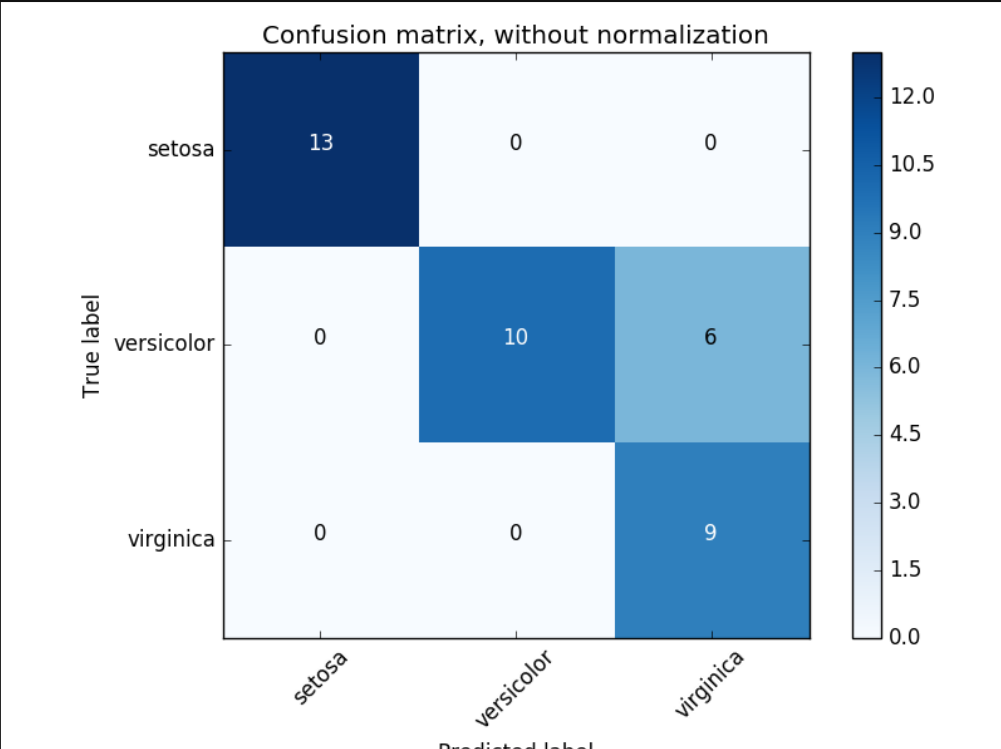
- ROC Curve: curva definida por true positive rate x false positive rate, AUC calcula a integral da função (área abaixo do gráfico)
   -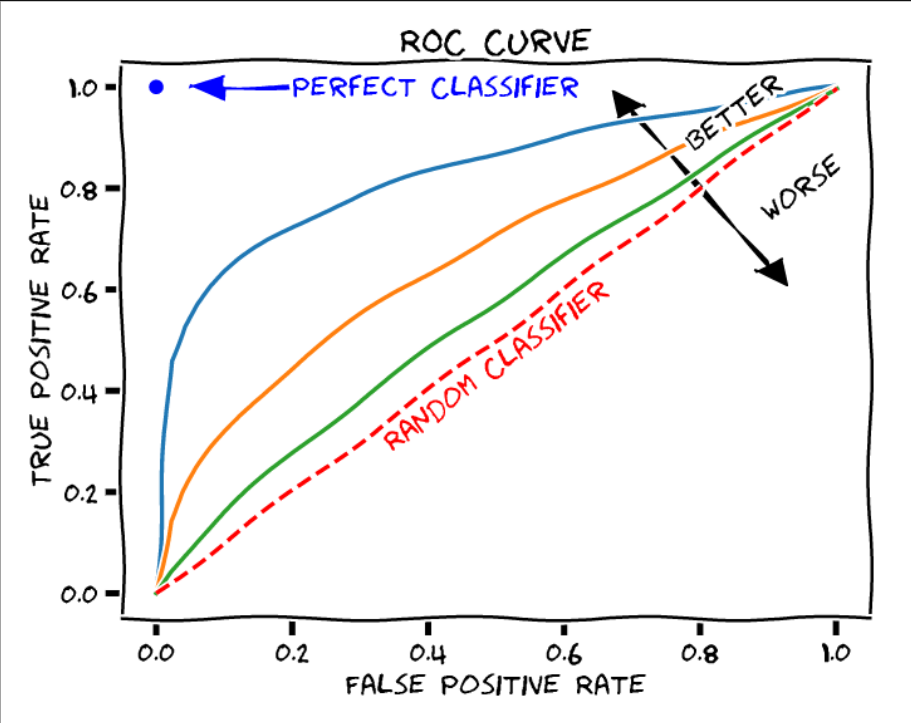

In [34]:
## Prevendo
y_pred = rf_random.predict(test_features)

In [35]:
def apresentando_metricas(test_labels, y_pred):
    ## Calculando métricas
    acc = accuracy_score(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred, average = 'weighted')
    recall = recall_score(test_labels, y_pred, average = 'weighted')
    f1 = f1_score(test_labels, y_pred, average = 'weighted')
    ## Exibindo métricas
    print("Accuracy:", acc)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

In [36]:
apresentando_metricas(test_labels, y_pred)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


## Apresentando Matriz de Confusão

In [37]:
def gera_matriz_confusao(test_labels_aux, y_pred_aux):
    ## gerando matriz de confusão
    cm = confusion_matrix(test_labels_aux, y_pred_aux, labels = [0,1,2])
    
    ## plotando matriz de confusão com seaborn
    # plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot = True, fmt='d', cmap = 'Blues',  xticklabels=['setosa', 'versicolo', 'virginica'], 
                yticklabels=['setosa', 'versicolo', 'virginica'], cbar=True)
    
    # Adicionando título e labels
    plt.title('Matriz de Confusão')
    plt.xlabel('Classe Predita')
    plt.ylabel('Classe Real')
    
    # Mostrar o gráfico
    plt.show()

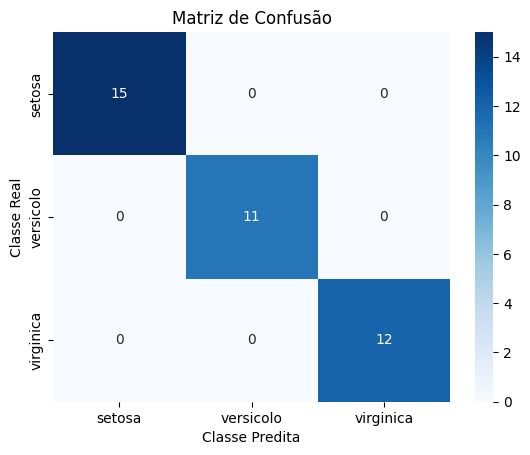

In [38]:
gera_matriz_confusao(test_labels, y_pred)

## Support Vector Machine (SVM)
- OBS: o SVM tem um modelo de Regressão, o Support Vector Regression (SVR)
- Pode classificar linear e não linear data
- Cada dado é representado como ponto em um espaço n-dimensional, sendo n o número de features. Exemplo: 3 features no df, cada linha é um ponto no espaço tridimensional das variáveis
- O hiperplano é a fronteira de decisão que separa duas classes, e o SVM procura o hiperplano que maximiza a margem entre essas duas classes ( a distância mínima do hiperplano para cada classe)
- Isso acontece pois quanto maior o espaçamento entre as classes (margem) , melhor a generalização e desempenho do modelo
- SVM portanto é uma técnica poderosa para classificação, especialmente em cenários de alta dimensionalidade ou com classes não linearmente separadas
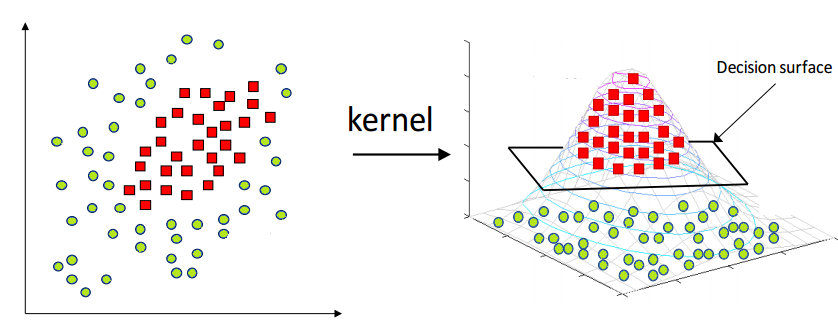

## Naive Bayes
 - Baseia-se no Teorema de Bayes

### Teorema de Bayes
 - Fórmula que descreve como atualizar as probabilidades de hipóteses (classes) a medida que novos atributos (features) se tornam disponíveis:
    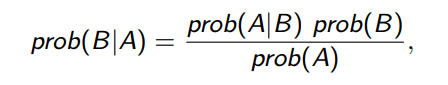
### Classificação
 - Usando o Teorema de Bayes para classificar um novo objeto, tempos a probabilidade do objeto de pertencer a cada classe possível. O que tiver a maior probabilidade é escolhido

### Exemplo
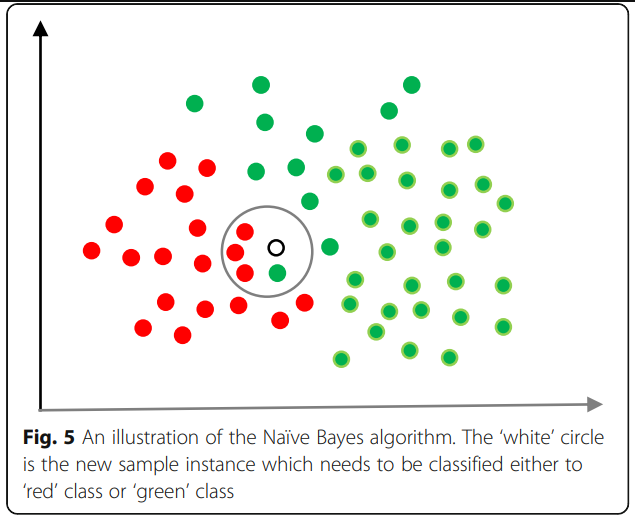
- Nesse caso, a probabilidade a priori, mostrada no teorema, é mais favorável ao verde, pois há 40 verdes e 20 vermelhos.
- A verossimilhança indica que a maior probabilidade é o vermelho, dado à proximidade das classes
- De tal forma , o teorema de bayes combina essas duas probabilidades e calcula a probabilidade geral

## K-nearest neighbour
- Versão mais simples do Naive Bayes, Classificador
- o "K" do KNN refere-se ao número de vizinhos próximos considerados na votação
- Para classificar um novo objeto, o algoritmo calcula a distância entre esse objeto e todos os outros pontos de dados do conjunto de treinamento.
- Os K vizinhos mais próximos votam então para a classe à qual pertencem. De tal forma, o novo objeto é classificado

## Escolha de K 
 - K geralmente varia entre 3 e 5, 1 torna o modelo muito sensível a ruídos, e um K muito grande pode incluir vizinhos não tão relevantes
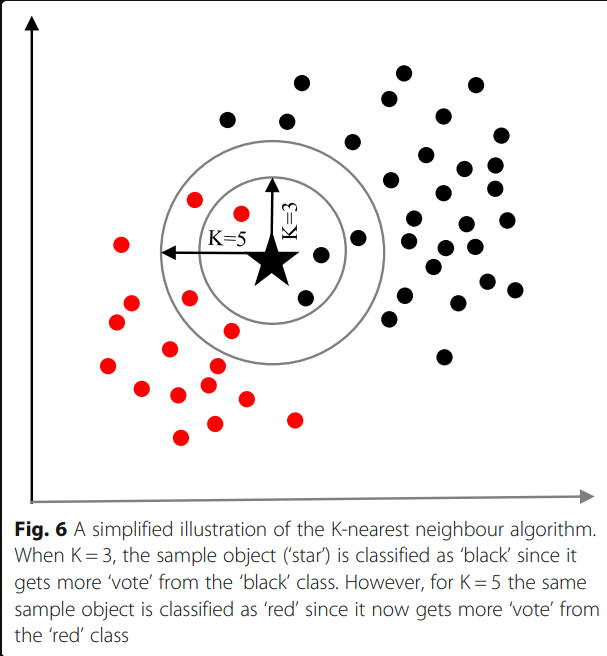

## XGBoost (Extreme Gradient Boosting)

- Classificação e Regressão
- Altamente escalável
- Combina várias árvores de decisão (decision trees) fracas para formar um modelo forte. Cada árvore é treinada para melhorar a anterior
- Usa técnica de ensemble Boosting (melhorando ao longo do tempo)
- Possui termos de regularização (L1 e L2) que ajudam a evitar o Overfitting

## Processo de treinamento
- 1-) Inicizalização: previsão inicial com média de valores de saída (regressão) ou classe mais frequente (classificação)
- 2-) Treinamento das árvores: a cada iteração, uma nova árvore é adicionada ao modelo tentando minimizar a função de perda
- 3-) Ajuste de pesos: o algoritmo vai ajustando os pesos das previsões anteriores, focando mais em amostras com alto erro
- 4-) Atualização das previsões
- 5-) Repetição até ou número predefinido de árvores alcançado ou até que a melhoria na performance do modelo fosse insignificante

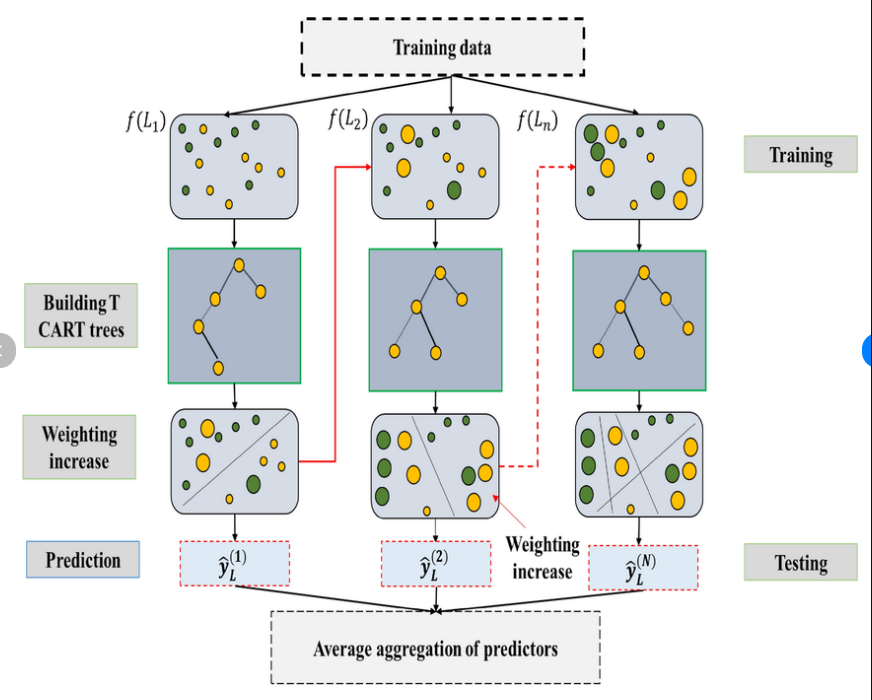